# PDS: Assignment 2

### Deadline: January 20 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment2.ipynb (ex. Mussalim_Kaisar_1905_Assignment2.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 1 point.

## Q1 (1 point)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [1]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [2]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

In [3]:
import pandas as pd
import numpy as np
import statistics as st
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
#Task 1
mean_se = st.mean(gpa_se)
stdev_se = np.std(gpa_se)
num_se = len(gpa_se)

mean_bda = st.mean(gpa_bda)
stdev_bda = np.std(gpa_bda)
num_bda = len(gpa_bda)

std_error = stdev_se/np.sqrt(num_se)
se_ci_95 = stats.norm.interval(alpha=0.95, loc=mean_se, scale=std_error)

print('Lower:', se_ci_95[0])
print('Upper:', se_ci_95[1])

Lower: 3.081371997981136
Upper: 3.242858771249633


$H_0: \mu = 2.9$

$H_1: \mu > 2.9$

In [5]:
#Task 2
t_crit_10 = stats.t.isf(q=0.10,  loc=0, scale=1, df=num_se-1)
print(t_crit_10)
t_crit_5 = stats.t.isf(q=0.05,  loc=0, scale=1, df=num_se-1)
print(t_crit_5)
t_crit_1 = stats.t.isf(q=0.01,  loc=0, scale=1, df=num_se-1) 
print(t_crit_1)
print('According t value approach there is an evidence for that.')

1.2983727126531854
1.6752849498502624
2.4017175253545253
According t value approach there is an evidence for that.


In [6]:
#Task 3
var_se = st.variance(gpa_se)
var_bda = st.variance(gpa_bda)
mean_diff = mean_se - mean_bda
std_error_diff = np.sqrt(var_se/num_se + var_bda/num_bda)

ci_95_diff = stats.norm.interval(alpha=0.95, loc = mean_diff, scale = std_error_diff)

print('Lower:', ci_95_diff[0])
print('Upper:', ci_95_diff[1])

Lower: -0.3162204998228543
Upper: -0.0975487309463773


Task 4: The answer for this question lays in Q2T3. BDA students GPA is greater

In [7]:
#Task 5
std_error1 = stdev_se/np.sqrt(30)
std_error2 = stdev_se/np.sqrt(20)
se_ci_95_1 = stats.norm.interval(alpha=0.95, loc=mean_se, scale=std_error1)
se_ci_95_2 = stats.norm.interval(alpha=0.95, loc=mean_se, scale=std_error2)

print('Lower:', se_ci_95_1[0])
print('Upper:', se_ci_95_1[1])
print('Lower:', se_ci_95_2[0])
print('Upper:', se_ci_95_2[1])
print('Confidence interval would continue to expand.')

Lower: 3.0558117764563755
Upper: 3.2684189927743934
Lower: 3.031920585712217
Upper: 3.292310183518552
Confidence interval would continue to expand.


## Q2 (1 point)
Taking the information from Q1, let's do the following:
1. Test the hypothesis that the average GPA for big data students is larger than 3.1. 

2. Test the hypothesis that two groups have equal average GPA. 

3. Test the hypothesis that BDA group has higher average GPA than SE group. 

For all three tasks: State the hypothesis, and then perform the test. Choose correct procedure of choosing significance levels. Derive proper conclusion in the context of the problem.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

$H_0: \mu = 3.1$

$H_1: \mu > 3.1$

In [8]:
#Task 1
test_statistic = (mean_bda - 3.1)/(stdev_bda/np.sqrt(num_bda))
p_value = stats.norm.cdf(test_statistic)
t_crit_10 = stats.t.isf(q=0.10,  loc=0, scale=1, df=num_bda-1)
print(t_crit_10)
t_crit_5 = stats.t.isf(q=0.05,  loc=0, scale=1, df=num_bda-1)
print(t_crit_5)
t_crit_1 = stats.t.isf(q=0.01,  loc=0, scale=1, df=num_bda-1) 
print(t_crit_1)
print(p_value)
print('According to P-value and t value approach we can accept the hypothesis that average GPA for bda students is greater than 3.1')

1.2960657250282173
1.6710930318274833
2.3912288325162177
0.9999999999998543
According to P-value and t value approach we can accept the hypothesis that average GPA for bda students is greater than 3.1


$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

In [9]:
#Task 2
hyp_test = stats.ttest_ind(gpa_se, gpa_bda, equal_var = False)
print('Test statistic:', round(hyp_test[0], 2))
print('P-value:', round(hyp_test[1], 5)) #very small
print('By looking on P-value, we can easily say that we are rejecting the null hypothesis and the average of two groupes are different.')

Test statistic: -3.71
P-value: 0.00033
By looking on P-value, we can easily say that we are rejecting the null hypothesis and the average of two groupes are different.


$H_0: \mu_1 \geq \mu_2$

$H_1: \mu_1 < \mu_2$

In [10]:
#Task 3
list_diff = [(gpa_se[i] - gpa_bda[i]) for i in range(len(gpa_se))]
t_crit_10 = stats.t.isf(q=0.10,  loc=0, scale=1, df=len(list_diff)-1) 
print(t_crit_10)
t_crit_5 = stats.t.isf(q=0.05,  loc=0, scale=1, df=len(list_diff)-1) 
print(t_crit_5)
t_crit_1 = stats.t.isf(q=0.01,  loc=0, scale=1, df=len(list_diff)-1)
print(t_crit_1)
print('These data provides strong evidence that bda students GPA is greater than se students.')

1.2983727126531854
1.6752849498502624
2.4017175253545253
These data provides strong evidence that bda students GPA is greater than se students.


## Q3 (1 points)
Now, continuing the situation from Q1, let's add a data about weekly self studying hours for the sample of software engineering students. For this question, we are going to focus only on SE students, and consider the relationship between GPA and weekly self studying hours. Do the following tasks:
1. Which one is the independent variable and which is the dependent variable?
2. Plot a scatter diagram. Put labels correctly. Describe the relationship based on the obtained graph.
3. Build a function for calculating sample correlation coefficient (it should take only two lists as an input). Then calculate this coefficient.
4. Use numpy's method to calculate correlation coefficient, and compare it with your result in Task 3. Give comment.
5. Is the obtained correlation coefficient value consistent with your description in Task 2. Give comment.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [11]:
hours_se = [15.9, 15.0, 10.2, 12.2, 16.0, 16.2, 18.1, 7.7, 12.2, 22.1, 17.8, 13.8, 14.9,
            15.7, 16.8, 15.7, 10.4, 14.9, 17.5, 11.8, 12.2, 12.7, 12.3, 12.0, 13.0, 15.3, 
            15.4, 13.8, 14.9, 12.6, 15.5, 16.6, 12.6, 16.6, 16.3, 14.5, 18.8, 15.1, 15.9,  
            13.6, 12.0, 19.3, 21.6, 11.5, 18.5, 16.6, 14.8, 15.9, 8.7, 10.1, 20.1, 14.6]

Task 1:
Explanatory - GPA; 
Response - Hours.

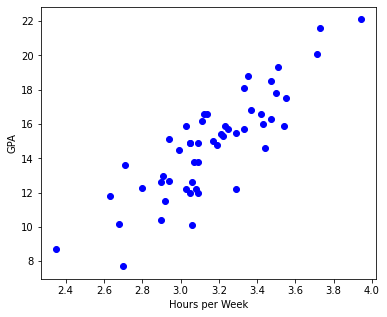

In [12]:
#Task 2
plt.figure(figsize=(6,5))
plt.scatter(gpa_se, hours_se, c='blue', marker='o') 
plt.xlabel('Hours per Week')
plt.ylabel('GPA')
plt.show()

Most of the students are studying 12-18 hours per week and their GPA varies from 2.8 to 3.6.

In [13]:
#Task 3
def corr_coeff(gpa_se, hour_se):
    sum_x = np.sum(gpa_se)
    sum_x2 = np.sum([i*i for i in gpa_se])

    sum_y = np.sum(hours_se)
    sum_y2 = np.sum([i*i for i in hours_se])

    sum_xy = np.sum([gpa_se[i]*hours_se[i] for i in range(len(gpa_se))])
    n = len(gpa_se)
    
    result = (sum_xy - sum_x*sum_y/n)/np.sqrt((sum_x2 - sum_x*sum_x/n)*(sum_y2 - sum_y*sum_y/n))
    return result

sds = np.corrcoef(gpa_se, hours_se)
print(corr_coeff(gpa_se, hours_se))

0.8489926548857274


In [14]:
#Task 4
corr_coeff = np.corrcoef(gpa_se, hours_se)
print(corr_coeff)
print('No difference there, except the rounding. It just takes 8 characters.')

[[1.         0.84899265]
 [0.84899265 1.        ]]
No difference there, except the rounding. It just takes 8 characters.


Task 5: Yes, correlation coefficient is consistent with my calculations.

## Q4 (1 point)
Continue Q3, but now we are going to build the linear regression model. Do the following tasks:
1. Build a function to calculate a slope of the model (it should take only two lists as an input). Calculate it.
2. Cacluate a y-intercept.
3. Show the equation for the least squares regression line. 
4. Derive this equation using some python's package. Compare results with Task 3.
5. Interpret slope and intercept in the context of our problem.
6. Plot a scatter diagram and draw the line of best fit.
7. Predict GPA for a student that spends 19 hours on self studying every week. 

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [15]:
#Task 1
def slope(gpa_se, hours_se):
    sum_x = np.sum(gpa_se)
    sum_x2 = np.sum([i*i for i in gpa_se])

    sum_y = np.sum(hours_se)
    sum_y2 = np.sum([i*i for i in hours_se])

    sum_xy = np.sum([gpa_se[i]*hours_se[i] for i in range(len(gpa_se))])
    n = len(gpa_se)
    
    result = (sum_xy - sum_x*sum_y/n)/(sum_x2 - sum_x*sum_x/n)
    return result

print(slope(gpa_se, hours_se))

8.535231098995727


In [16]:
#Task 2
print(stats.linregress(gpa_se, hours_se).intercept)

-12.214385569382069


In [17]:
#Task 3
print(stats.linregress(gpa_se, hours_se).intercept + stats.linregress(gpa_se, hours_se).slope*np.array(gpa_se))

[18.00033252 14.84229701 10.66003378 14.07412622 17.0614571  14.33018315
 16.20793399 10.8307384  15.86652475 21.41442496 17.65892328 13.9887739
 13.81806928 16.20793399 16.54934323 15.5251155  12.53778462 13.81806928
 18.08568483 10.23327222 13.64736466 12.87919386 11.68426151 13.81806928
 12.62313693 15.26905857 15.18370626 14.15947853 14.15947853 13.90342159
 15.86652475 14.41553546 12.53778462 16.97610479 17.40286634 13.30595542
 16.37863861 12.87919386 13.64736466 10.91609071 14.15947853 17.74427559
 19.62202643 12.70848924 17.40286634 14.58624008 15.01300164 15.35441088
  7.84340751 13.90342159 19.45132181 17.14680941]


In [18]:
#Task 4
from sklearn.linear_model import LinearRegression
X = np.array(gpa_se).reshape((-1, 1))
y = np.array(hours_se)
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print(y_pred)
print('Results are the same.')

[18.00033252 14.84229701 10.66003378 14.07412622 17.0614571  14.33018315
 16.20793399 10.8307384  15.86652475 21.41442496 17.65892328 13.9887739
 13.81806928 16.20793399 16.54934323 15.5251155  12.53778462 13.81806928
 18.08568483 10.23327222 13.64736466 12.87919386 11.68426151 13.81806928
 12.62313693 15.26905857 15.18370626 14.15947853 14.15947853 13.90342159
 15.86652475 14.41553546 12.53778462 16.97610479 17.40286634 13.30595542
 16.37863861 12.87919386 13.64736466 10.91609071 14.15947853 17.74427559
 19.62202643 12.70848924 17.40286634 14.58624008 15.01300164 15.35441088
  7.84340751 13.90342159 19.45132181 17.14680941]
Results are the same.


Task 5: Intercept shows the value of hours when gpa is equal to zero, whereas slope shows the change in hours when gpa increases for one unit.

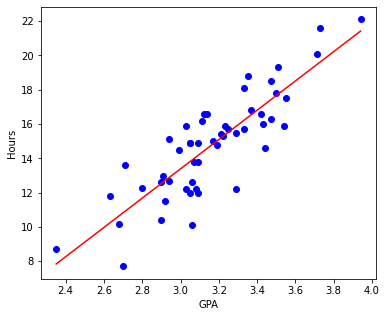

In [19]:
#Task 6
plt.figure(figsize=(6,5))
plt.scatter(X, y, c='blue', marker='o') 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  #regression line
plt.xlabel('GPA')
plt.ylabel('Hours')
plt.show()

In [20]:
#Task 7


## Q5 (1 point)
Is there an evidence that increasing weekly hours of self studying, indeed, yields in higher GPA. You can use either confidence interval or hypothesis testing for this question. Please describe each step of the solution.

*Hint: this is a difficult question, leave it to the end, i.e. it would require some self study haha :D.*

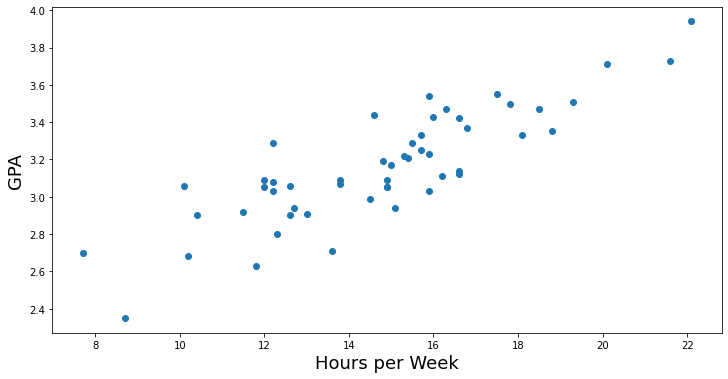

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x = hours_se, y = gpa_se)
plt.xlabel('Hours per Week', fontsize=18)
plt.ylabel('GPA', fontsize=18)

plt.show()

In [22]:
t_crit_10 = stats.t.isf(q=0.10,  loc=0, scale=1, df=num_bda-1)
print(t_crit_10)
t_crit_5 = stats.t.isf(q=0.05,  loc=0, scale=1, df=num_bda-1)
print(t_crit_5)
t_crit_1 = stats.t.isf(q=0.01,  loc=0, scale=1, df=num_bda-1) 
print(t_crit_1)

1.2960657250282173
1.6710930318274833
2.3912288325162177


In [23]:
t_crit_10 = stats.t.isf(q=0.10,  loc=0, scale=1, df=num_se-1)
print(t_crit_10)
t_crit_5 = stats.t.isf(q=0.05,  loc=0, scale=1, df=num_se-1)
print(t_crit_5)
t_crit_1 = stats.t.isf(q=0.01,  loc=0, scale=1, df=num_se-1) 
print(t_crit_1)

1.2983727126531854
1.6752849498502624
2.4017175253545253
